In [1]:
library(FactoMineR)
library(factoextra)
library(ggplot2)
library(reshape2)
library(dplyr)
library(fpc)

Loading required package: ggplot2
Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



# データの読み込みとケース名設定・標準化

In [2]:
dir()

[1] "ClusteringPrefMedicalDataByR.ipynb" "Iryou-Pref.csv"                    
[3] "Iryou_Pref_Clustering.ipynb"

In [3]:
iryou <- read.csv(file="Iryou-Pref.csv"); head(iryou)

Pref,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D13,D14,D15,D16,D17,D18,D19,D20,D21,D22
Hokkaido,9.2,62.0,1536.3,224.6,1170.2,7.4,42.9,42.0,10.9,...,30.7,14626.5,1.96,625.4,341.0,12.5,4.6,175.5,92.0,21.2
Aomori,6.4,66.1,1111.5,184.5,1018.1,8.3,35.7,43.3,9.8,...,27.3,11484.5,2.27,725.2,369.7,16.0,5.3,198.7,135.5,23.3
Iwate,5.9,70.5,1081.4,189.6,972.1,7.6,36.9,44.1,8.5,...,25.9,11572.5,2.07,725.0,333.0,13.2,6.2,211.7,160.9,26.4
Miyagi,4.9,69.5,870.1,218.3,856.9,4.8,42.2,47.7,8.4,...,20.7,11640.5,1.84,547.1,280.4,10.1,6.5,143.7,106.3,19.8
Akita,5.5,77.2,1178.5,207.5,1004.2,8.0,37.4,50.0,9.7,...,25.9,13054.2,2.08,785.7,392.8,15.2,7.4,207.4,162.8,26.5
Yamagata,4.8,81.0,1025.6,210.0,941.8,6.7,37.0,47.4,8.4,...,22.4,13405.8,1.80,727.3,353.4,11.3,5.8,204.7,152.1,24.6


In [4]:
rownames(iryou) <- iryou$Pref; head(iryou)

,Pref,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D13,D14,D15,D16,D17,D18,D19,D20,D21,D22
Hokkaido,Hokkaido,9.2,62.0,1536.3,224.6,1170.2,7.4,42.9,42.0,10.9,...,30.7,14626.5,1.96,625.4,341.0,12.5,4.6,175.5,92.0,21.2
Aomori,Aomori,6.4,66.1,1111.5,184.5,1018.1,8.3,35.7,43.3,9.8,...,27.3,11484.5,2.27,725.2,369.7,16.0,5.3,198.7,135.5,23.3
Iwate,Iwate,5.9,70.5,1081.4,189.6,972.1,7.6,36.9,44.1,8.5,...,25.9,11572.5,2.07,725.0,333.0,13.2,6.2,211.7,160.9,26.4
Miyagi,Miyagi,4.9,69.5,870.1,218.3,856.9,4.8,42.2,47.7,8.4,...,20.7,11640.5,1.84,547.1,280.4,10.1,6.5,143.7,106.3,19.8
Akita,Akita,5.5,77.2,1178.5,207.5,1004.2,8.0,37.4,50.0,9.7,...,25.9,13054.2,2.08,785.7,392.8,15.2,7.4,207.4,162.8,26.5
Yamagata,Yamagata,4.8,81.0,1025.6,210.0,941.8,6.7,37.0,47.4,8.4,...,22.4,13405.8,1.80,727.3,353.4,11.3,5.8,204.7,152.1,24.6


In [5]:
vars <- colnames(iryou)[-1]; vars

[1] "D1"  "D2"  "D3"  "D4"  "D5"  "D6"  "D7"  "D8"  "D9"  "D10" "D11" "D12"
[13] "D13" "D14" "D15" "D16" "D17" "D18" "D19" "D20" "D21" "D22"

In [6]:
iryou.std <- as.data.frame(scale(iryou[,vars])); head(iryou.std)

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,D13,D14,D15,D16,D17,D18,D19,D20,D21,D22
Hokkaido,0.7885170,-1.4566120,1.28962742,-0.1509559,0.63037369,0.8770727,0.03262691,-0.4203961,1.7530027,1.6525270,...,0.64943160,1.3834830,0.6718715,0.1923782,0.9112635,0.1752174,-0.8803673,0.03032198,-0.65331618,0.01763099
Aomori,-0.2111828,-1.1174926,-0.20011061,-1.2054651,-0.01679319,1.4003473,-1.33045280,-0.2218938,0.8069668,0.3974233,...,-0.04058947,-0.5176020,3.4293834,1.3491133,1.7018497,1.6383275,-0.4278035,0.75858388,1.08769650,0.93351454
Iwate,-0.3897006,-0.7535596,-0.30566879,-1.0713505,-0.21251755,0.9933559,-1.10327285,-0.0997385,-0.3110756,-0.1932137,...,-0.32471580,-0.4643571,1.6503434,1.3467952,0.6908911,0.4678394,0.1540643,1.16666167,2.10428781,2.28553310
Miyagi,-0.7467363,-0.8362716,-1.04668020,-0.3166269,-0.70267945,-0.6346097,-0.09989473,0.4499603,-0.3970789,-0.8576804,...,-1.38004214,-0.4232133,-0.3955525,-0.7151605,-0.7580578,-0.8280580,0.3480202,-0.96789907,-0.08098327,-0.59295804
Akita,-0.5325149,-0.1993888,0.03485278,-0.6006344,-0.07593598,1.2259224,-1.00861453,0.8011568,0.7209635,-0.1932137,...,-0.32471580,0.4321539,1.7392954,2.0503405,2.3381752,1.3039023,0.9298880,1.03168209,2.18033204,2.32914661
Yamagata,-0.7824398,0.1149170,-0.50135472,-0.5348919,-0.34144034,0.4700813,-1.08434118,0.4041521,-0.3970789,-0.2670433,...,-1.03503161,0.6448915,-0.7513605,1.3734534,1.2528408,-0.3264203,-0.1045436,0.94692748,1.75208295,1.50049006


# 主成分分析と主成分得点の取得

In [7]:
pca <- PCA(iryou.std)
names(pca)

[1] "eig"  "var"  "ind"  "svd"  "call"

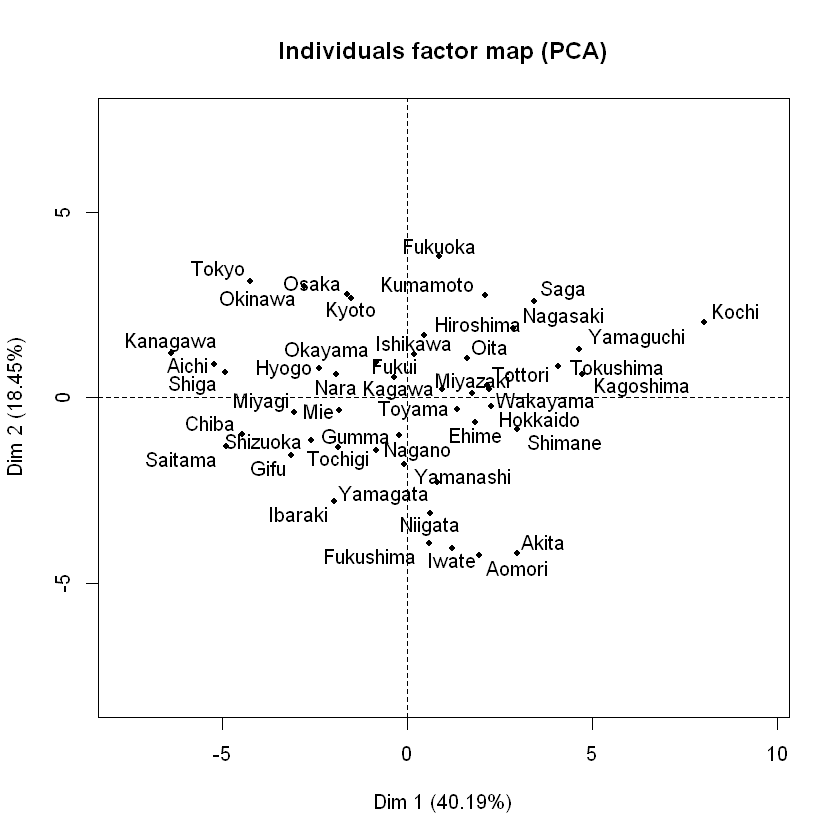

In [18]:
plot(pca,choix="ind")

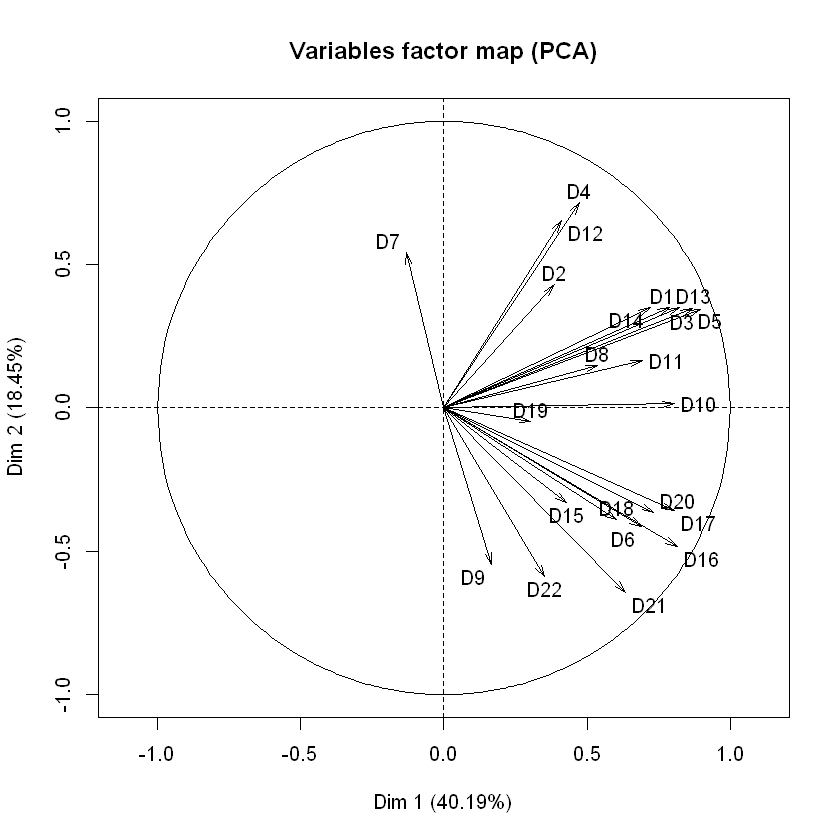

In [8]:
plot(pca,choix="var")

In [9]:
iryou.std$PC1 <- pca$ind$coord[,1]
iryou.std$PC2 <- pca$ind$coord[,2]

# クラスター分析

## 非階層的クラスタリング

In [10]:
clst4 <- kmeans(iryou.std[,c("PC1", "PC2")], centers=4, iter.max=100) # クラスタ数＝４

In [11]:
clst3 <- kmeans(iryou.std[,c("PC1", "PC2")], center=3, iter.max=100) # クラスタ数＝３

In [12]:
iryou.std$clst4 <- as.factor(clst4$cluster)
iryou.std$clst3 <- as.factor(clst3$cluster)

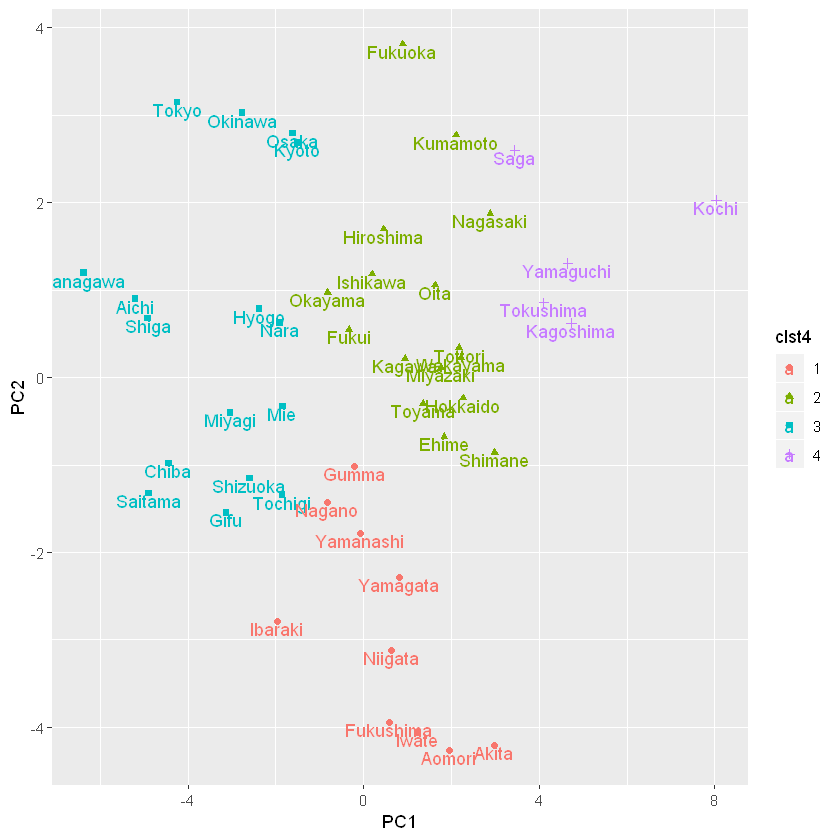

In [13]:
ggplot(iryou.std,aes(x=PC1, y=PC2, color=clst4)) + geom_point(aes(shape=clst4)) + geom_text(label=rownames(iryou.std), vjust=1)

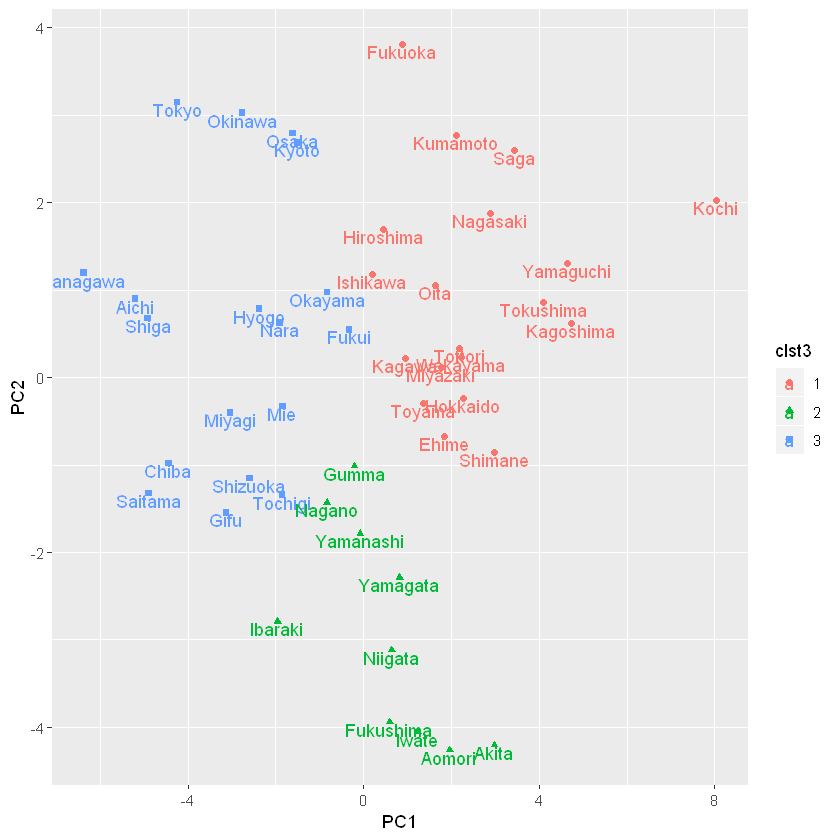

In [29]:
ggplot(iryou.std,aes(x=PC1, y=PC2, color=clst3)) + geom_point(aes(shape=clst3)) + geom_text(label=rownames(iryou.std), vjust=1)

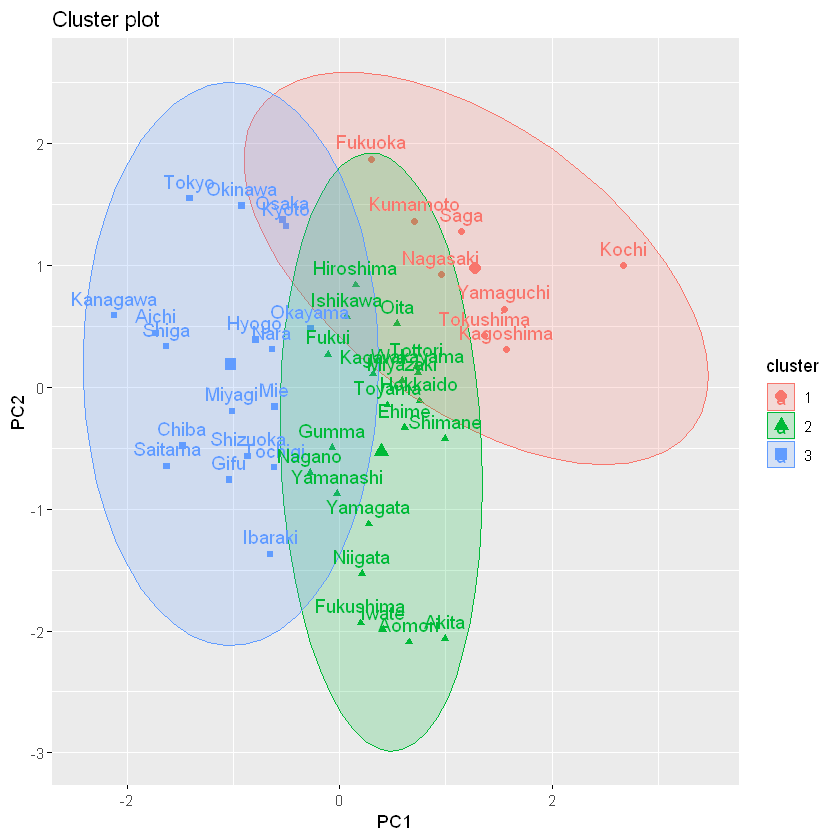

In [14]:
fviz_cluster(clst3, iryou.std[,c("PC1","PC2")],ellipse.type = "norm")

In [16]:
require(cluster)
sil <- silhouette(clst3$cluster, dist(iryou.std[,c("PC1", "PC2")]))

シルエット図を作成しておく。距離行列を与える必要があるが、クラスタリングは主成分得点"PC1", "PC2"を対象に行ったので、この二つの値を対象に計算した。以下同様である。

  cluster size ave.sil.width
1       1    8          0.39
2       2   21          0.32
3       3   18          0.38


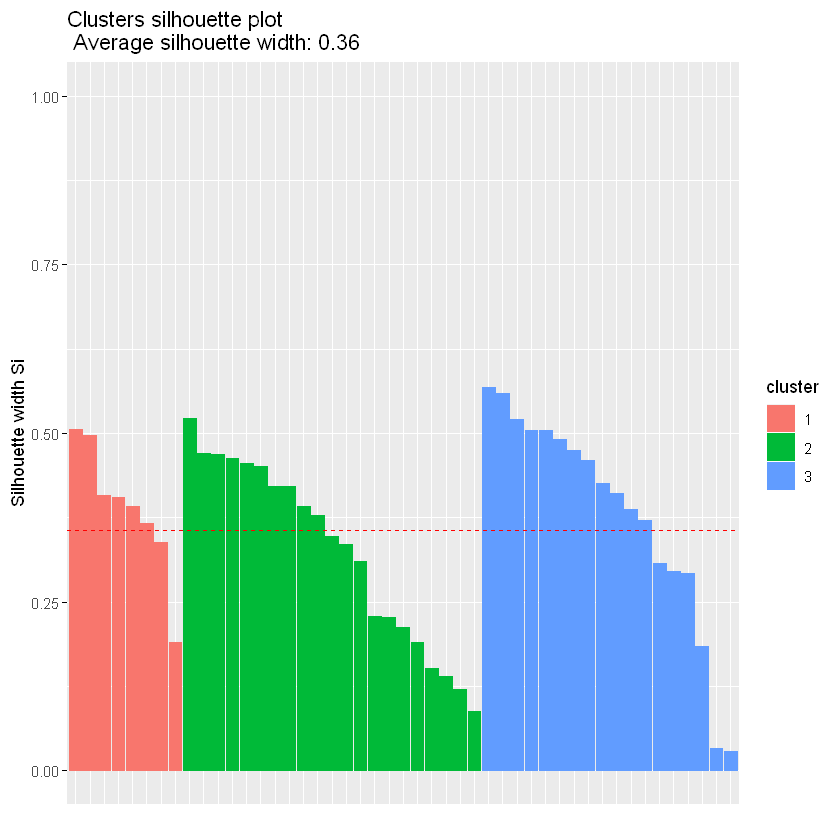

In [17]:
fviz_silhouette(sil)

  cluster size ave.sil.width
1       1   10          0.41
2       2   16          0.37
3       3   16          0.36
4       4    5          0.39


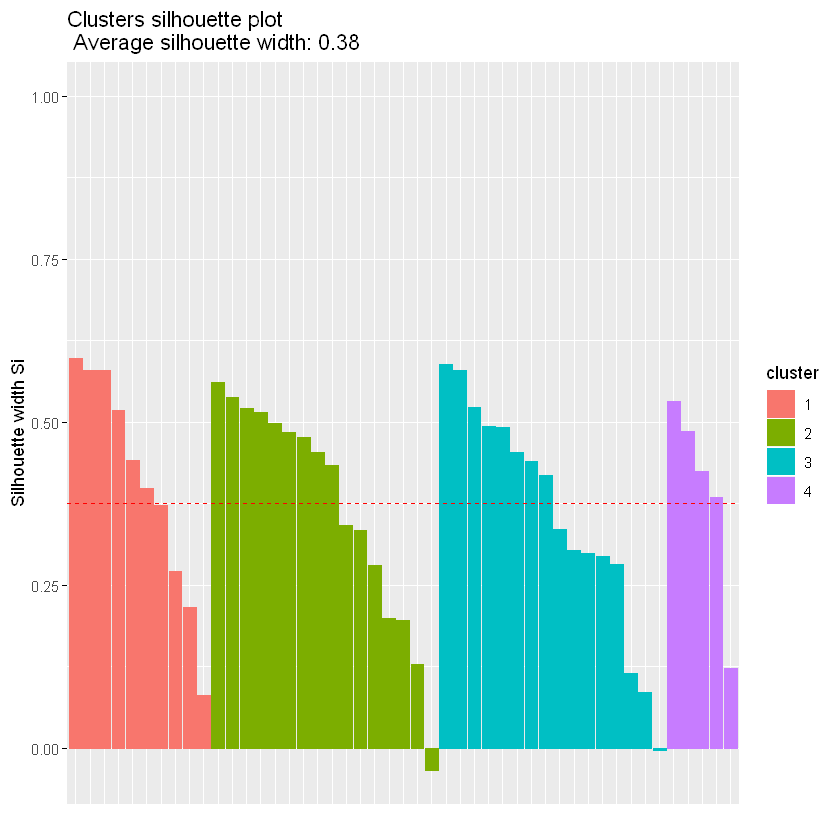

In [18]:
require(cluster)
sil <- silhouette(clst4$cluster, dist(iryou.std[,c("PC1", "PC2")]))
fviz_silhouette(sil)

上のシルエット図から推測されるのは、CH指標とは異なり、クラスター数を４個とするほうが3個よりは僅かにパフォーマンスが良いのではないかという点である。

In [30]:
sqr_edist <- function(x, y){
  sum((x-y)^2)
}

wss.cluster <- function(clustermat){
  c0 <- apply(clustermat, 2, FUN=mean)
  sum(apply(clustermat, 1, FUN=function(row){sqr_edist(row,c0)}))
}

wss.total <- function(dmatrix, labels){
  wsstot <- 0
  k <- length(unique(labels))
  for(i in 1:k){
    wsstot <- wsstot + wss.cluster(subset(dmatrix, labels==i))
  }
  wsstot
}

totss <- function(dmatrix){
  grandmean <- apply(dmatrix,2,FUN=mean)
  sum(apply(dmatrix, 1, FUN=function(row){sqr_edist(row, grandmean)}))
}
ch_criterion <- function(dmatrix, kmax, method="kmeans"){
  if(!(method %in% c("kmeans", "hclust"))){
    stop("method must be one of c('kmeans','hclust')")
  }
  npts <- dim(dmatrix)[1] # number of rows
  totss <- totss(dmatrix)
  wss <- numeric(kmax)
  crit <- numeric(kmax)
  
  wss[1] <- (npts-1)*sum(apply(dmatrix,2,var))
  for(k in 2:kmax){
    if(method=="kmeans"){
      clustering <- kmeans(dmatrix, k, nstart=10, iter.max = 100)
      wss[k] <- clustering$tot.withinss
    } else {
      d <- dist(dmatrix, method="euclidean")
      pfit <- hclust(d, method="ward")
      labels <- cutree(pfit, k=k)
      wss[k] <- wss.total(dmatrix, labels)
    }
  }
  bss <- totss - wss
  crit.num <- bss/(0:(kmax-1))
  crit.denom <- wss/(npts - 1:kmax)
  crit <- crit.num / crit.denom
  crit[1] <- NA
  list(crit=crit, wss=wss, totss=totss)
}

In [31]:
clustcrit <- ch_criterion(iryou.std[,c("PC1", "PC2")], 10, method="kmeans")

In [32]:
critframe <- data.frame(k=1:10, ch=scale(clustcrit$crit), wss=scale(clustcrit$wss))

In [33]:
head(critframe)

k,ch,wss
1,NA,2.47322260
2,-0.9565808,0.84500079
3,-0.5110945,0.19208486
4,-1.1133449,-0.07288019
5,-0.9725930,-0.28195237
6,-0.0643496,-0.46609724


In [34]:
critframe2 <- melt(critframe, id.vars = c("k"), variable.name = "measure", value.name = "score")
head(critframe2)

k,measure,score
1,ch,NA
2,ch,-0.9565808
3,ch,-0.5110945
4,ch,-1.1133449
5,ch,-0.9725930
6,ch,-0.0643496


Warning message:
"Removed 1 rows containing missing values (geom_point)."Warning message:
"Removed 1 rows containing missing values (geom_path)."

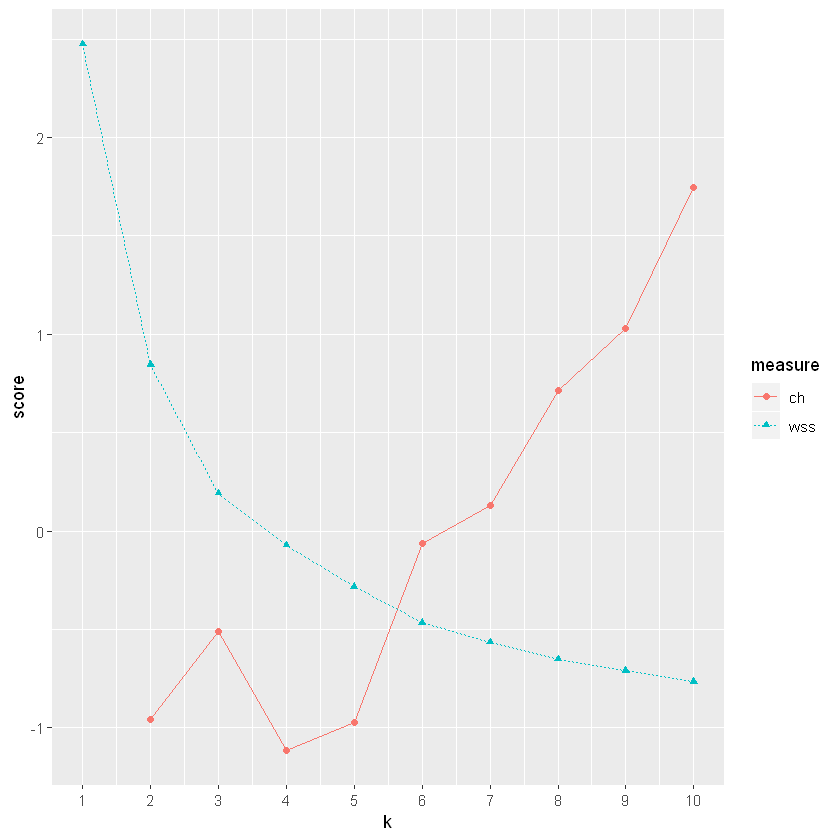

In [35]:
ggplot(critframe2, aes(x=k, y=score, color=measure)) +
  geom_point(aes(shape=measure)) +
  geom_line(aes(linetype=measure)) +
  scale_x_continuous(breaks=1:10, labels=1:10)

上の図に見る通り、指標"Calinski-Harabasz Index"によれば、クラスタ数は４個よりは３個のほうが良い。

In [19]:
cboot <- clusterboot(iryou.std[, c("PC1", "PC2")], clustermethod=kmeansCBI, krange=3)

boot 1 
boot 2 
boot 3 
boot 4 
boot 5 
boot 6 
boot 7 
boot 8 
boot 9 
boot 10 
boot 11 
boot 12 
boot 13 
boot 14 
boot 15 
boot 16 
boot 17 
boot 18 
boot 19 
boot 20 
boot 21 
boot 22 
boot 23 
boot 24 
boot 25 
boot 26 
boot 27 
boot 28 
boot 29 
boot 30 
boot 31 
boot 32 
boot 33 
boot 34 
boot 35 
boot 36 
boot 37 
boot 38 
boot 39 
boot 40 
boot 41 
boot 42 
boot 43 
boot 44 
boot 45 
boot 46 
boot 47 
boot 48 
boot 49 
boot 50 
boot 51 
boot 52 
boot 53 
boot 54 
boot 55 
boot 56 
boot 57 
boot 58 
boot 59 
boot 60 
boot 61 
boot 62 
boot 63 
boot 64 
boot 65 
boot 66 
boot 67 
boot 68 
boot 69 
boot 70 
boot 71 
boot 72 
boot 73 
boot 74 
boot 75 
boot 76 
boot 77 
boot 78 
boot 79 
boot 80 
boot 81 
boot 82 
boot 83 
boot 84 
boot 85 
boot 86 
boot 87 
boot 88 
boot 89 
boot 90 
boot 91 
boot 92 
boot 93 
boot 94 
boot 95 
boot 96 
boot 97 
boot 98 
boot 99 
boot 100 


In [20]:
group <- cboot$result$partition
for(i in 1:3){
    print(paste("Cluster", i))
    print(rownames(iryou.std)[group==i])
}

[1] "Cluster 1"
 [1] "Miyagi"   "Tochigi"  "Saitama"  "Chiba"    "Tokyo"    "Kanagawa"
 [7] "Fukui"    "Gifu"     "Shizuoka" "Aichi"    "Mie"      "Shiga"   
[13] "Kyoto"    "Osaka"    "Hyogo"    "Nara"     "Okayama"  "Okinawa" 
[1] "Cluster 2"
 [1] "Hokkaido"  "Toyama"    "Ishikawa"  "Wakayama"  "Tottori"   "Shimane"  
 [7] "Hiroshima" "Yamaguchi" "Tokushima" "Kagawa"    "Ehime"     "Kochi"    
[13] "Fukuoka"   "Saga"      "Nagasaki"  "Kumamoto"  "Oita"      "Miyazaki" 
[19] "Kagoshima"
[1] "Cluster 3"
 [1] "Aomori"    "Iwate"     "Akita"     "Yamagata"  "Fukushima" "Ibaraki"  
 [7] "Gumma"     "Niigata"   "Yamanashi" "Nagano"   


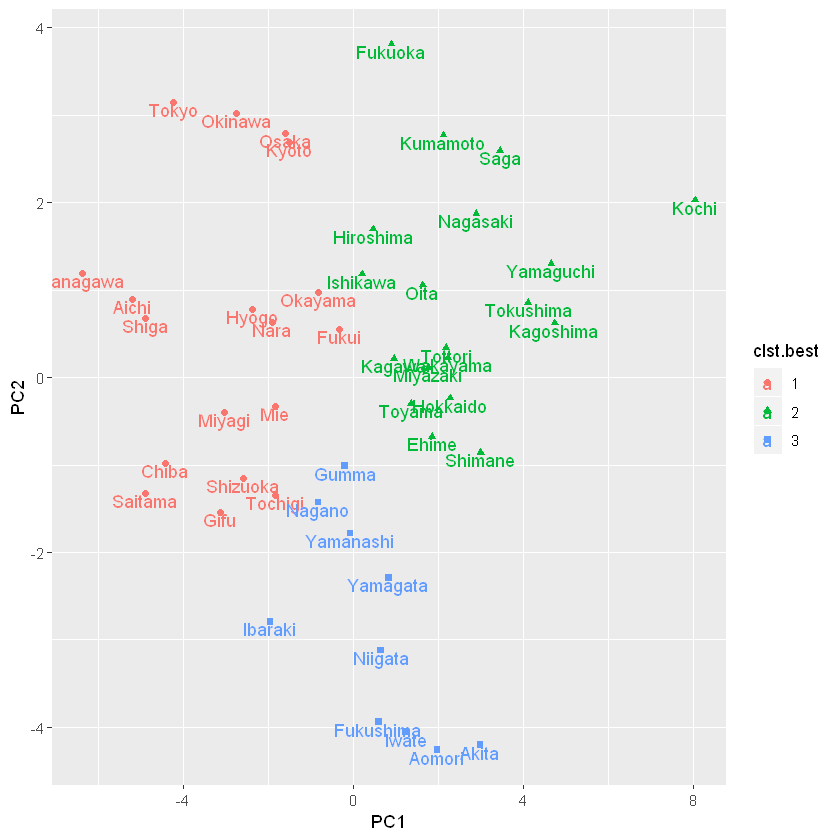

In [21]:
iryou.std$clst.best <- as.factor(group)
ggplot(iryou.std,aes(x=PC1, y=PC2, color=clst.best)) + geom_point(aes(shape=clst.best)) + geom_text(label=rownames(iryou.std), vjust=1)

シルエット図を作成しておく。但し、上に注意しているように距離行列を与える必要がある。ここではクラスタリングを主成分得点"PC1", "PC2"によって行ったので、これら二つの値を対象に距離を計算した。

  cluster size ave.sil.width
1       1   18          0.37
2       2   19          0.40
3       3   10          0.47


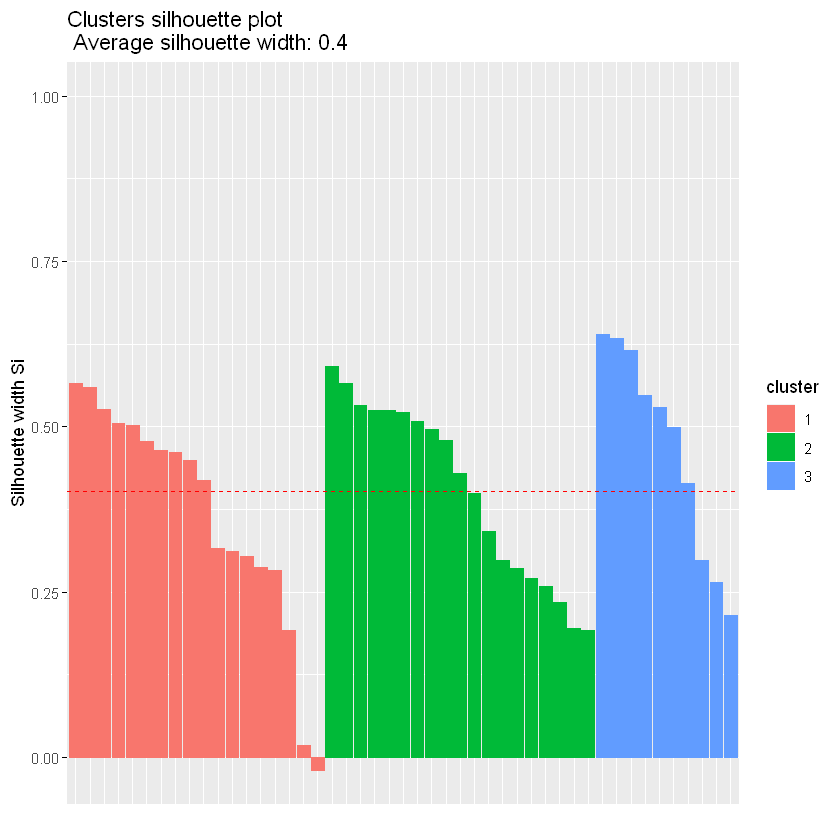

In [23]:
require(cluster)
sil <- silhouette(cboot$result$partition, dist(iryou.std[,c("PC1", "PC2")]))
fviz_silhouette(sil)

シルエット図を見ても、このクラスタリングは先述したクラスター４個のケースよりも改善されている。

## 階層型クラスタリング

In [45]:
colnames(iryou.std)

[1] "D1"        "D2"        "D3"        "D4"        "D5"        "D6"       
 [7] "D7"        "D8"        "D9"        "D10"       "D11"       "D12"      
[13] "D13"       "D14"       "D15"       "D16"       "D17"       "D18"      
[19] "D19"       "D20"       "D21"       "D22"       "PC1"       "PC2"      
[25] "clst4"     "clst3"     "clst.best"

階層型クラスタリングでは都道府県間の違い（=距離）をあらかじめ求めておくことが必要になる。ここでは第１・第２主成分得点ではなく、全ての個別データ（D1からD22）から距離を計算することにする。距離を評価する際には、標準化しておくことが前提になる。

In [35]:
distance <- dist(iryou.std[,vars], method="euclidean")

In [36]:
print(distance)

           Hokkaido    Aomori     Iwate    Miyagi     Akita  Yamagata Fukushima
Aomori     5.640492                                                            
Iwate      6.308961  3.356901                                                  
Miyagi     6.853932  7.283585  6.172911                                        
Akita      6.451242  3.597502  2.935079  7.505025                              
Yamagata   6.119688  5.588163  3.578981  5.353825  3.970347                    
Fukushima  5.634527  3.999411  3.836116  5.681293  4.604619  5.047794          
Ibaraki    5.646985  5.141460  4.962709  4.067294  6.469322  5.717975  3.608244
Tochigi    6.598640  5.561821  4.559293  3.792511  6.297451  4.784225  5.204351
Gumma      5.005689  5.446303  4.195492  4.212286  5.185458  3.916103  4.531273
Saitama    7.884895  8.442517  8.208801  5.475572  9.881095  8.215007  7.343108
Chiba      7.418842  8.135491  7.475342  3.802548  8.996367  7.213747  6.317766
Tokyo      9.469265 10.597218  9.542824 

The "ward" method has been renamed to "ward.D"; note new "ward.D2"


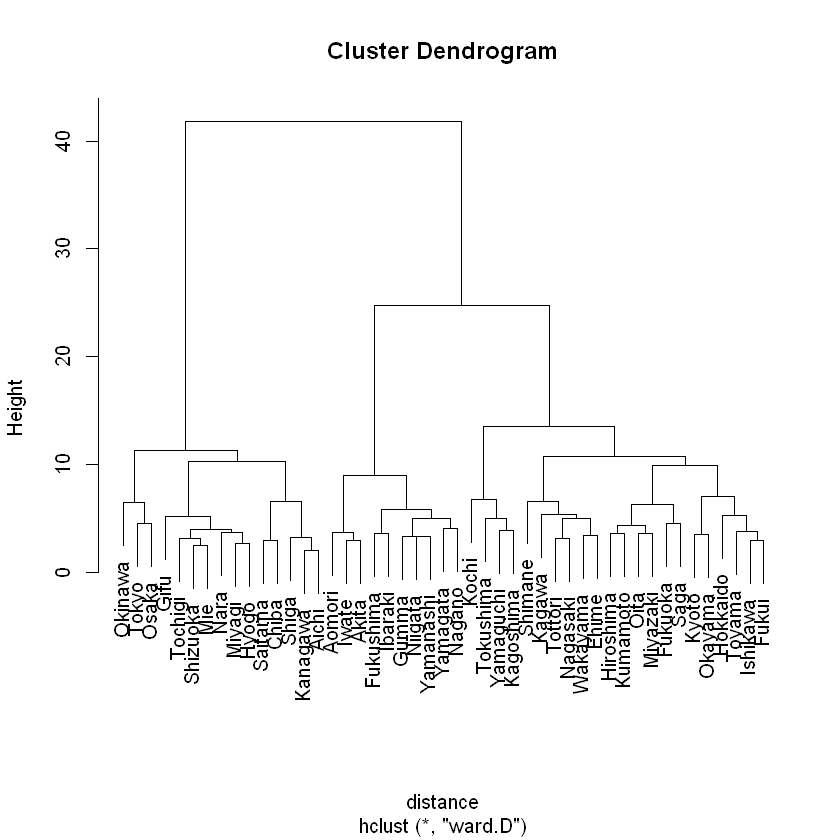

In [37]:
fit <- hclust(distance, method="ward")
plot(fit)

In [38]:
group.hclust <- cutree(fit, k=3)
for(i in 1:3){
    print(paste("Cluster",i))
    print(rownames(iryou.std)[group.hclust==i])
}

[1] "Cluster 1"
 [1] "Hokkaido"  "Toyama"    "Ishikawa"  "Fukui"     "Kyoto"     "Wakayama" 
 [7] "Tottori"   "Shimane"   "Okayama"   "Hiroshima" "Yamaguchi" "Tokushima"
[13] "Kagawa"    "Ehime"     "Kochi"     "Fukuoka"   "Saga"      "Nagasaki" 
[19] "Kumamoto"  "Oita"      "Miyazaki"  "Kagoshima"
[1] "Cluster 2"
 [1] "Aomori"    "Iwate"     "Akita"     "Yamagata"  "Fukushima" "Ibaraki"  
 [7] "Gumma"     "Niigata"   "Yamanashi" "Nagano"   
[1] "Cluster 3"
 [1] "Miyagi"   "Tochigi"  "Saitama"  "Chiba"    "Tokyo"    "Kanagawa"
 [7] "Gifu"     "Shizuoka" "Aichi"    "Mie"      "Shiga"    "Osaka"   
[13] "Hyogo"    "Nara"     "Okinawa" 


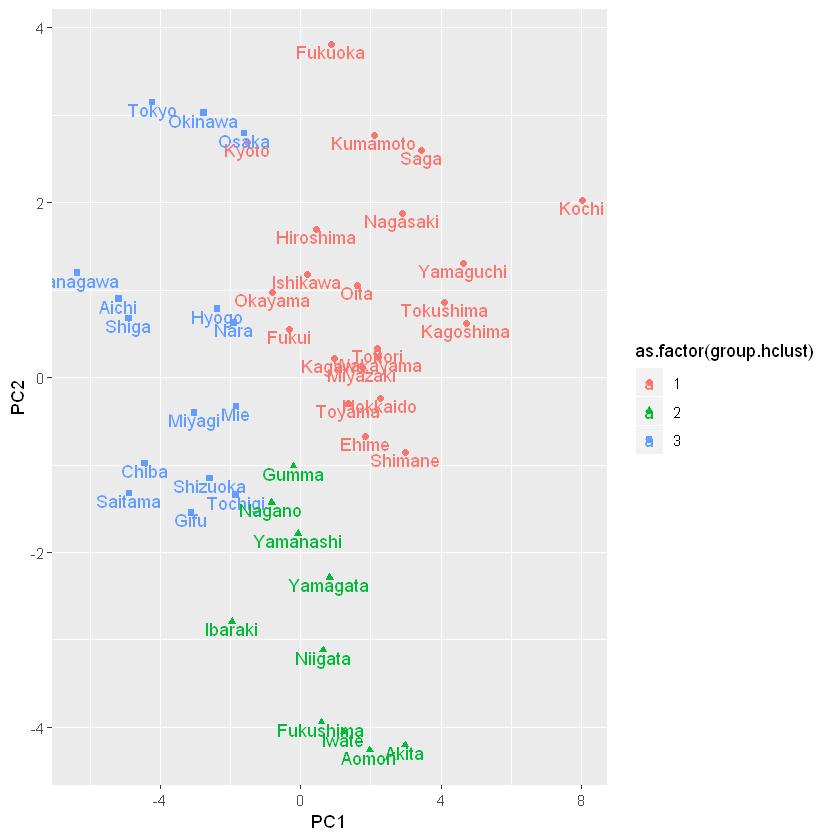

In [39]:
ggplot(iryou.std, aes(x=PC1, y=PC2, color=as.factor(group.hclust))) + 
  geom_point(aes(shape=as.factor(group.hclust))) +
  geom_text(label=rownames(iryou.std), vjust=1)

### 別コマンドで階層型クラスタリング

In [29]:
hc.cut <- hcut(iryou.std[,vars], k=3, hc_method="ward") # hclust -> cutreeを一度に実行

The "ward" method has been renamed to "ward.D"; note new "ward.D2"


下のデンドログラムは上で得られた図と一致している。

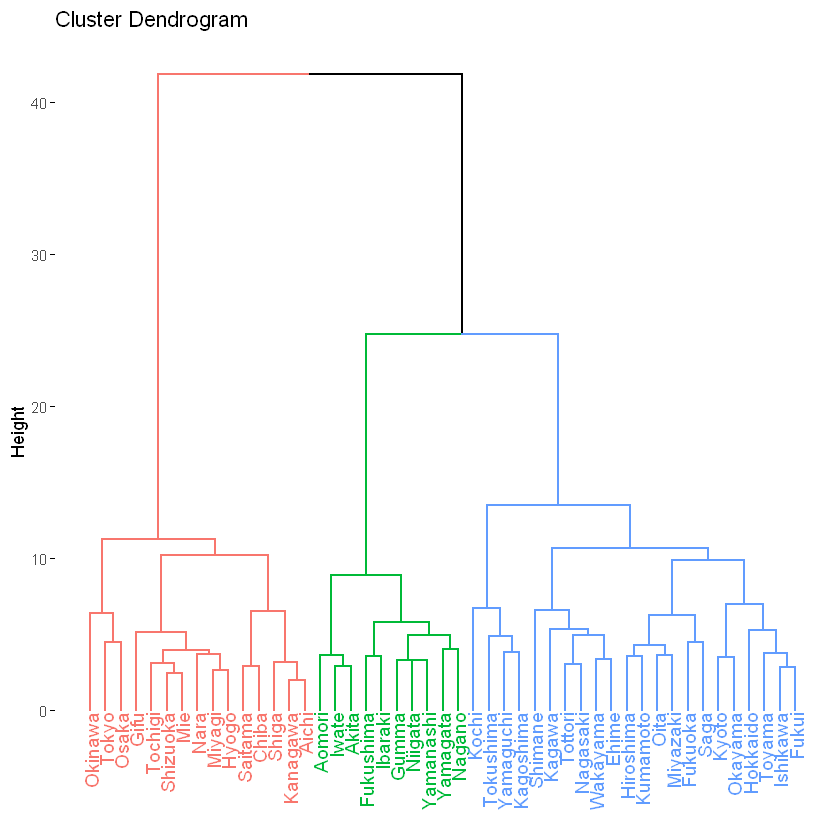

In [33]:
fviz_dend(hc.cut)

階層型クラスタリングは距離行列に依存して決まるので非階層的クラスタリングのように結果にランダム性が残る余地はない。但し、上では"Ward法"を用いたが、これを"comlete"のように別の方法を選択すると全く違った結果が得られる。

ここで得られたクラスタリングのクウォリティであるが、下に見るようにシルエット分析によればあまり良くない。

  cluster size ave.sil.width
1       1   22          0.11
2       2   10          0.27
3       3   15          0.24


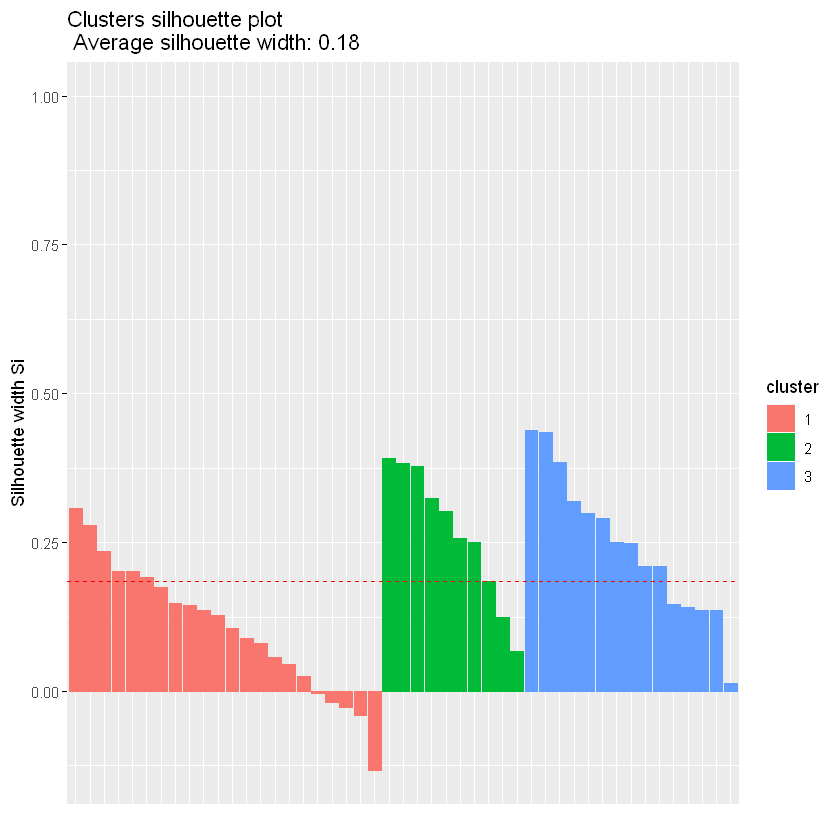

In [32]:
fviz_silhouette(hc.cut)

特に第１クラスターに他と異質なメンバーが含まれているようである。

### WardからCompleteに変更して再クラスタリング

In [40]:
hc.cut.comp <- hcut(iryou.std[,vars], k=3, hc_method="complete")

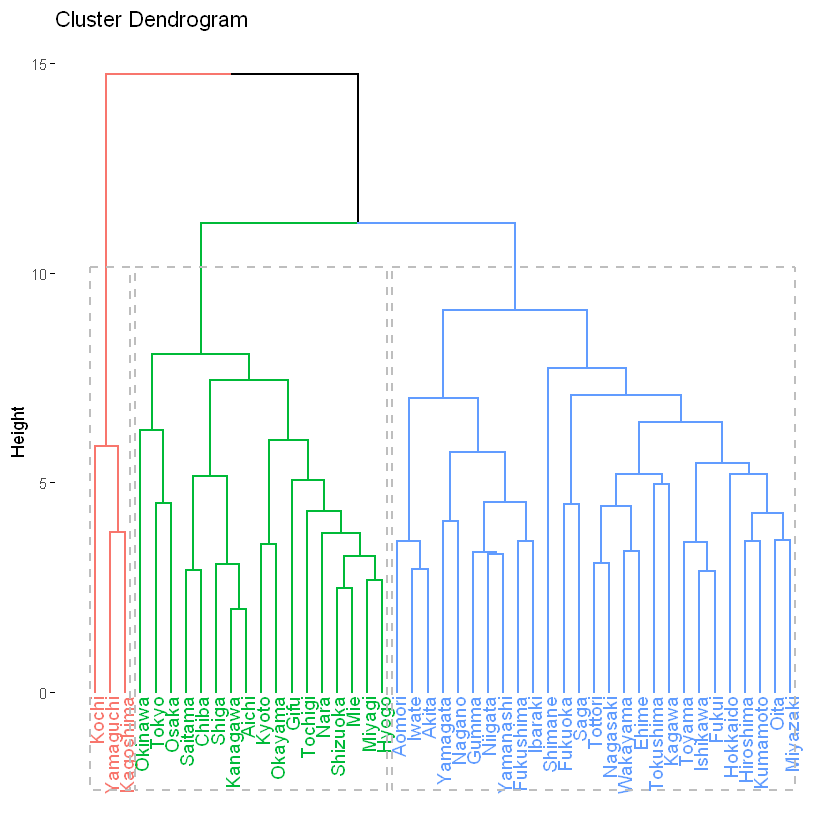

In [41]:
fviz_dend(hc.cut.comp,rect=TRUE)

やはり良くない。クラスター数を４個に増やして試みよう。

In [43]:
hc.cut.comp4 <- hcut(iryou.std[,vars], k=4, hc_method="complete")

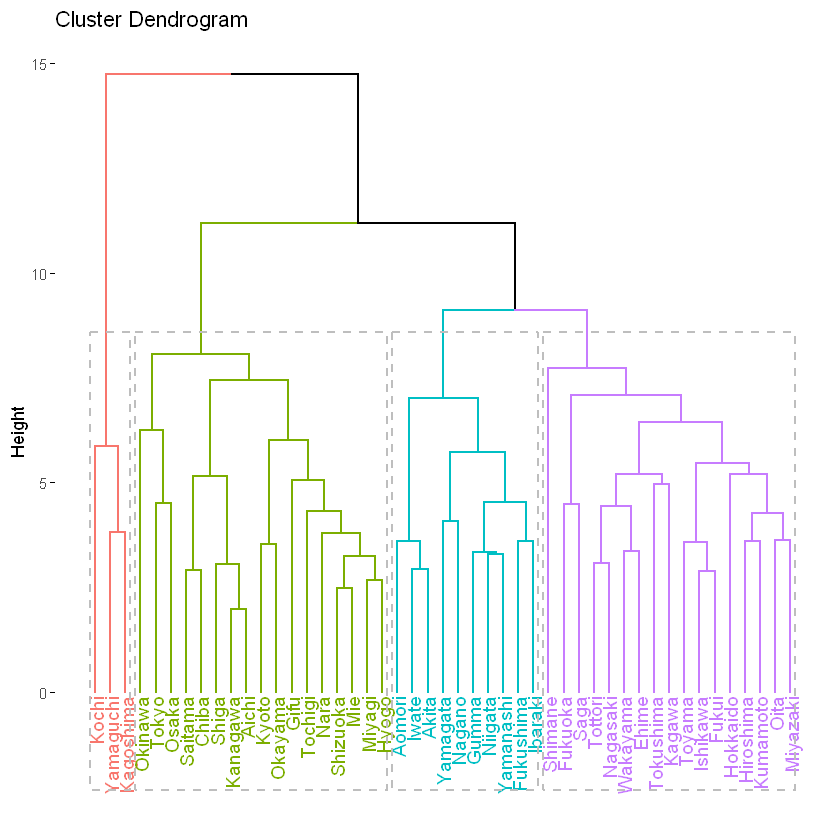

In [45]:
fviz_dend(hc.cut.comp4,rect=TRUE)

  cluster size ave.sil.width
1       1   17          0.09
2       2   10          0.24
3       3   17          0.21
4       4    3          0.23


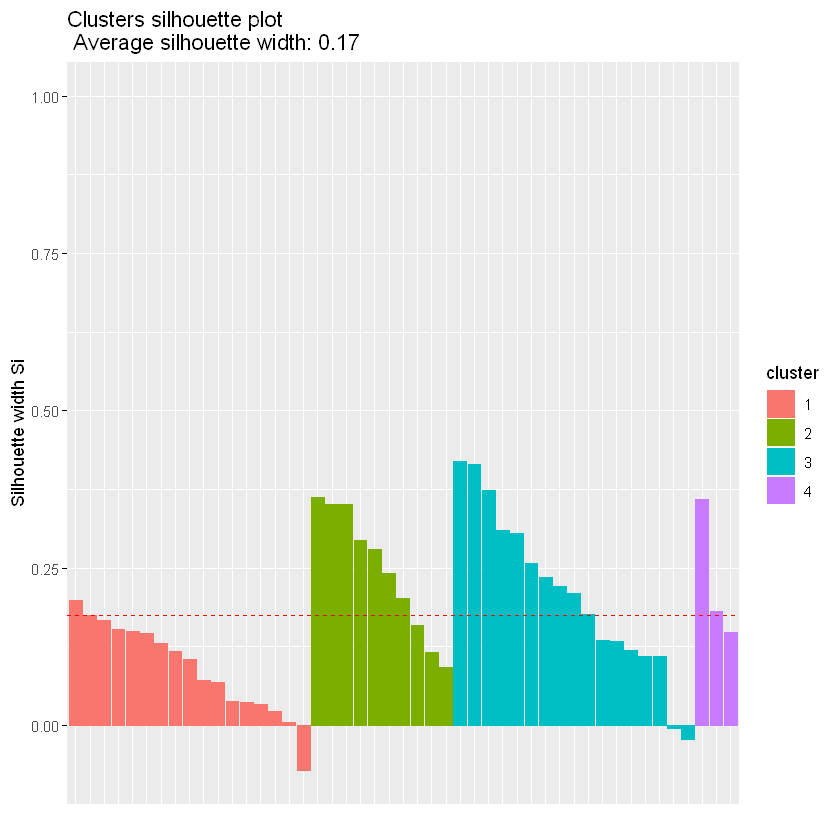

In [46]:
fviz_silhouette(hc.cut.comp4)

どうやら階層型クラスリングは結果にランダム性が残らないというメリットはあるものの、結果の最適性については疑問が残るようである。非階層型クラスタリングをclusterbootで反復実行して安定的な結果を得るのが良いのではないか。最後に、前と同様、主成分得点"PC1"と"PC2"に基づいて三つのクラスターに分ける計算をしておく。

In [47]:
hc.cut.final <- hcut(iryou.std[,c("PC1","PC2")], k=3, hc_method="complete")

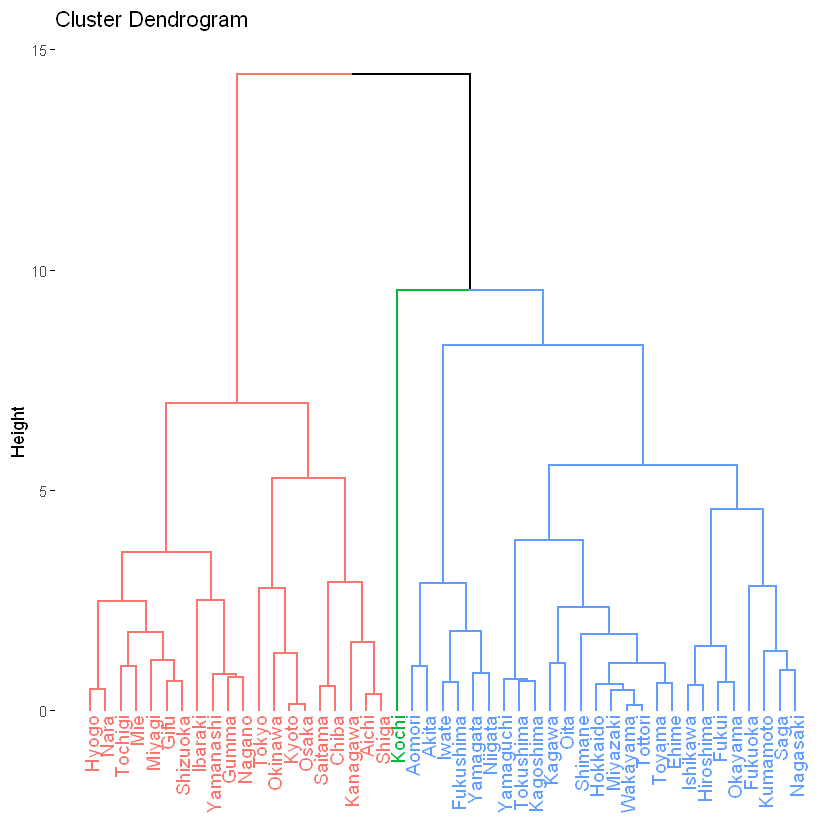

In [48]:
fviz_dend(hc.cut.final)

  cluster size ave.sil.width
1       1   26          0.29
2       2   20          0.38
3       3    1          0.00


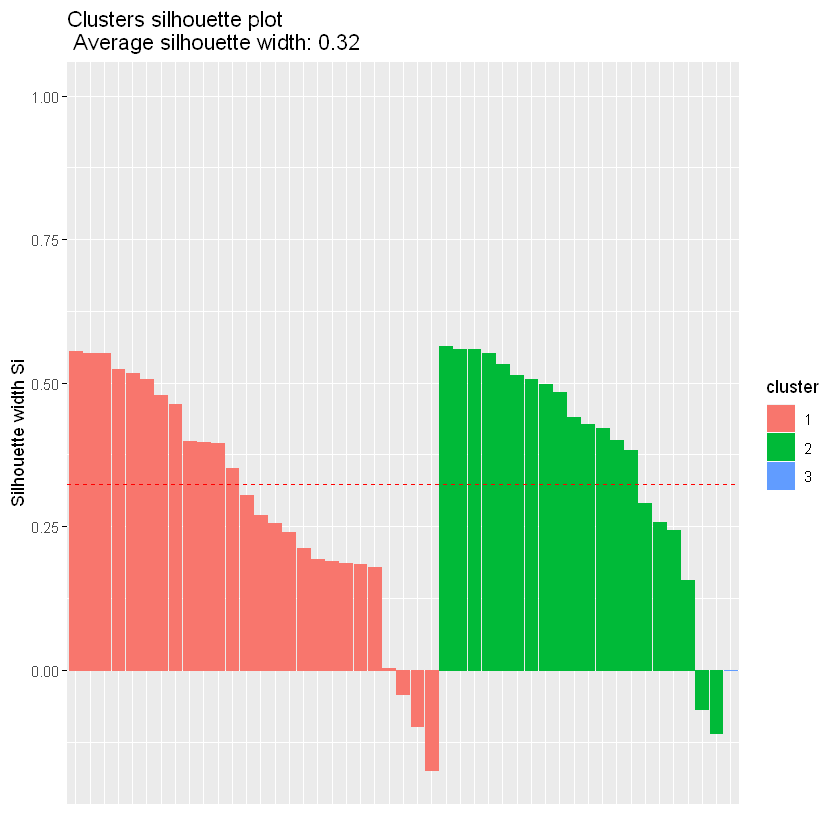

In [49]:
fviz_silhouette(hc.cut.final)

高知県が外れ値として一つのクラスターを形成するという結果になった。パフォーマンスはそれほど良くないが、ASW（Average Silhouette Width）は改善されている。